# Kernel Density Estimation

Before running the code, you should install the `sklearn` package. Type in a code cell in the notebook:
```
!pip install scikit-learn
```

In [1]:
import sklearn

In [2]:
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import norm

In [4]:
%matplotlib inline

In [5]:
def kde_sklearn(x, x_grid, bandwidth=0.2, kernel='gaussian', **kwargs):
    """Kernel Density Estimation with Scikit-learn
    valid kernels are ['gaussian'|'tophat'|'epanechnikov'|'exponential'|'linear'|'cosine']
    the default kernel is 'gaussian'"""
    kde_skl = KernelDensity(bandwidth=bandwidth, kernel=kernel, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [6]:
def silverman_rule(x):
    # interquartile range
    iqr = np.percentile(x,75) - np.percentile(x,25)
    # optimal bandwidth
    h = 0.9 * min(np.std(x), iqr/1.34) * len(x)**(-0.2)
    return h

In [7]:
def scott_rule(x):
    # interquartile range
    iqr = np.percentile(x,75) - np.percentile(x,25)
    # optimal bandwidth
    h = 1.059 * min(np.std(x), iqr/1.34) * len(x)**(-0.2)
    return h

In [8]:
n_observations = 1000
x = np.random.randn(n_observations) + np.random.choice([0,3],size=n_observations,p=[.6,.4])

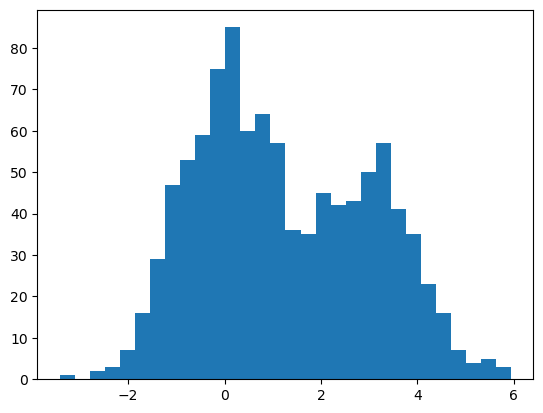

In [9]:
plt.hist(x, bins=30);

In [10]:
x_grid = np.linspace(-1,4,1000)

In [11]:
pdf = kde_sklearn(x, x_grid, bandwidth=scott_rule(x))

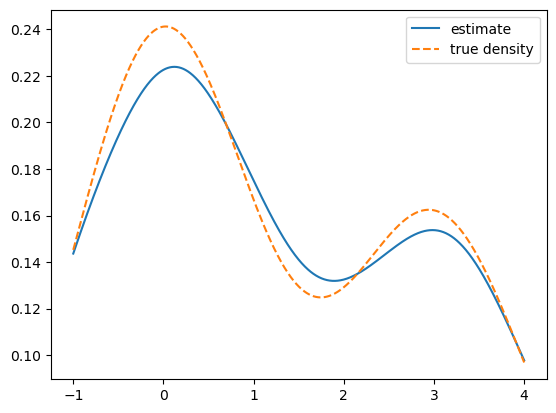

In [12]:
plt.plot(x_grid, pdf, label='estimate')
plt.plot(x_grid, .6*norm.pdf(x_grid) + .4 *norm.pdf(x_grid-3), label='true density',linestyle='--')
plt.legend()

In [13]:
pdf = kde_sklearn(x, x_grid, bandwidth=scott_rule(x), kernel='epanechnikov')

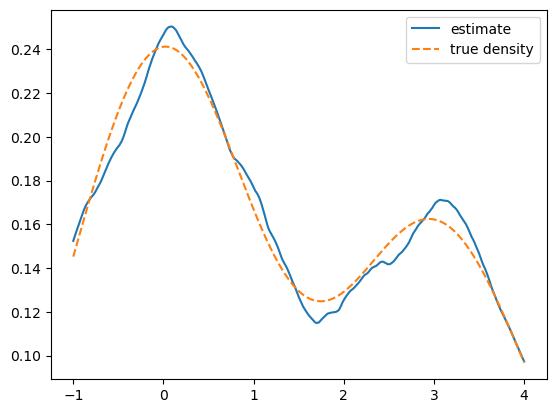

In [14]:
plt.plot(x_grid, pdf, label='estimate')
plt.plot(x_grid, .6*norm.pdf(x_grid) + .4 *norm.pdf(x_grid-3), label='true density',linestyle='--')
plt.legend()

## Exercise 1

Generate 10000 random numbers for a random variable $X = Y + Z$ where $Y$ in uniform on $[0,1]$ and $Z$ takes the value 0 with probability $0.7$ and the value 0.5 with probability $0.3$. 
 1. Plot a histogram of the empirical distribution of $X$.
 2. Construct a kernel density estimator for $X$.
 3. Compute the empirical cdf for $X$. (Hint computing the empirical cdf is implemented in the function `ECDF` in `statsmodels.distributions.empirical_distribution`.)

In [15]:
from scipy.stats import uniform

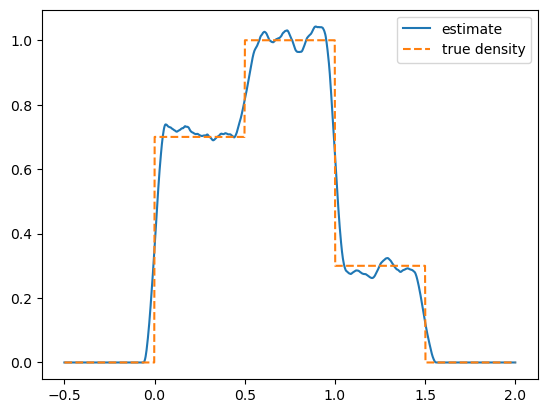

In [17]:
n = 10_000
Y = np.random.rand(n)
Z = np.random.choice([0,.5],size=n,p=[.7,.3])
X = Y + Z
x_grid = np.linspace(-.5,2,1000)
pdf = kde_sklearn(X, x_grid, kernel='epanechnikov', bandwidth=scott_rule(X))
plt.plot(x_grid, pdf, label='estimate')
plt.plot(x_grid, .7*uniform.pdf(x_grid) + .3 *uniform.pdf(x_grid, loc=0.5), label='true density',linestyle='--')
plt.legend()

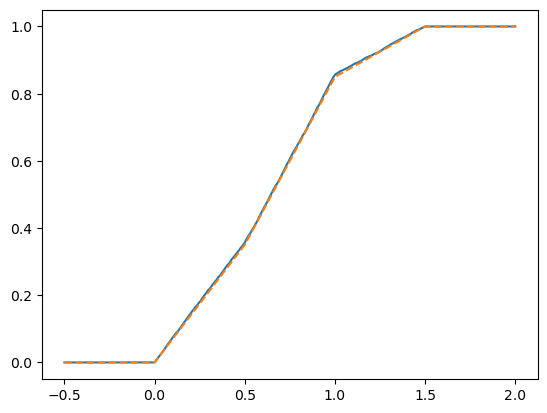

In [18]:
from statsmodels.distributions.empirical_distribution import ECDF
cdf = ECDF(X)(x_grid)
plt.plot(x_grid, cdf, label='estimate')
plt.plot(x_grid,.7*uniform.cdf(x_grid) + .3 *uniform.cdf(x_grid, loc=0.5), label='true density',linestyle='--')

## Exercise 2

Generate random bids from a first-price auction with 2 bidders. Assume that bidders are symmetric and their valuations $V_i$ are drawn from a uniform distribution on $[0,1]$ for $i=1,2$.
1. Plot a histogram of the bid distribution.
2. Use the Guerre-Perrigne-Vuong estimator to estimate the distribution of pseudo-valuations from the distribution of bids. Plot a histogram of the distribution of pseudo-valuations.
3. Construct a kernel density estimator for the distribution of pseudo-valuations. Also compute the empirical cdf.